# Метод конечных элементов. Иерархический базис 2-го порядка. 
## 405 группа, Иванов Родион. Задача №6

Решается следующее уравнение на $x \in [0,1]$:
$$ -u''(x) + x u(x) = f(x)$$


Граничные условия:
$$ u'(0)=u(1)=0$$

Точное решение:
$$ u(x) = cos(\frac{5 \pi x}{2})$$

Правая часть: 
$$ f(x) = (x+\frac{25 \pi^2}{4})cos(\frac{5 \pi x}{2}) $$

### Вариационное выражение:

$$\int_0^1 (v'(x) u'(x) + x u(x) v(x)) dx = \int_0^1 f(x) dx$$

### Иерархический базис 2-го порядка, определенный на каноническом элементе $\xi \in [-1,1]$:

$ N^1_{-1}(\xi) = \frac{\xi-1}{2} \text{;   }$ $N^2(\xi) = \frac{3(\xi^2 - 1)}{2 \sqrt{6}} \text{;   }$ $N^1_{1}(\xi) = \frac{\xi+1}{2}$

### Вывод выражений для матриц $M_j$, $K_j$  и вектора $I_j$:

Все интегрирования проводились в Wolfram Alpha, а матричные операции - с помощью MatrixCalc.org. Проводим дискретизацию равномерно, чтобы упросить вычисления, имея общий для всех элементов $h$.


$$
K_j = \frac{1}{h}
\begin{bmatrix}
1 & 0 & -1\\ 
0 &  2& 0\\ 
-1 & 0 & 1
\end{bmatrix}
$$

$$
M_j(x_{j-1}, x_j) = \frac{h}{2}
\begin{bmatrix}
\frac{1}{8} (3 x_{j-1} + x_j) & -\frac{3 x_{j-1} + 2 x_j}{5\sqrt{6}} & \frac{x_{j-1} + x_j}{6}\\ 
\cdots &  \frac{x_{j-1}+x_j}{5} & -\frac{2 x_{j-1}+3 x_j}{5\sqrt{6}}\\ 
\cdots & \cdots & \frac{1}{6}(x_{j-1}+3 x_j)
\end{bmatrix}
$$

Матрица $M_j$ симметрична, т.е. $M_j^{ab}=M_j^{ba}$поэтому используется символ $\cdots$ для улучшения читаемости. 

$$
I_j(f,x_{j-1}, x_j) = \frac{h}{6}
\begin{bmatrix}
2 f_{j-1} + f_j \\ 
-\sqrt{\frac{3}{2}}(f_{j-1} + f_j) &  \\ 
f_{j-1} + 2 f_j 
\end{bmatrix}
$$
При расчете $I_j$ использовалась линейная интерполяция вместо расчёта интегралов(Wolfram alpha отказался бесплатно считать такие интегралы).

### Построение глобальных K,M,J:

Комбинируются из $M_j$, $K_j$  и вектора $I_j$, так, что каждый следующий блок перекрывает предыдущий с суммированием в общем элементе. Для учета граничных условий выбрасывается последний столбец и последняя строка для матриц и последний элемент для вектора.

### Дальнейшее решение

Решаем линейную систему $(K+M)c=I$. В полученном векторе коэфф-в каждые 3 соотв-т своему элементу. Используем разложение по базису $[N^1_{-1}(\xi), N^2(\xi), N^1_1(\xi)]$, транслируя $\forall$ x в соотв-й ему $\xi$ на каноническом элементе через формулу:
$$
\xi(x,x_{j-1},x_j) = \frac{x_{j-1}+x_j-2x}{x_{j-1}-x_j}
$$


### Анализ погрешности(конец нотбука)
Введем величину погрешности $\Delta(x) = U_{\text{fem}}(x) - U(x)$, где $U_{\text{fem}}(x)$ - решение с помощью МКЭ.

Найдем две нормы погрешности:
\begin{equation*}
    ||\Delta||_0 = \left( \int |\Delta(x)|^2 dx \right)^{\frac{1}{2}}
\end{equation*}

\begin{equation*}
    ||\Delta||_1 = \left( \int \left| \frac{d\Delta(x)}{dx} \right|^2 dx \right)^{\frac{1}{2}}
\end{equation*}

In [1]:
import numpy as np
from matplotlib import pylab as plt
import math
from matplotlib import rc
from scipy.integrate import simps
%matplotlib inline

a = 0
b = 1


# Точное решение
def u(x):
    return np.cos(5*math.pi*x/2)

# Функция правой части
def f(x):
    return (x+25*math.pi*math.pi/4)*np.cos(5*math.pi*x/2) 

# Базисные функции
def N_1_m1(xi):
    return (1-xi)/2

def N_2(xi):
    return 3*(np.square(xi)-1)/(2*np.sqrt(6))

def N_1_1(xi):
    return (xi+1)/2


def K_j(h):
    K_j = np.zeros((3,3))
    K_j[0][0] = 1
    K_j[1][1] = 2
    K_j[2][2] = K_j[0][0]

    K_j[0][1] = 0
    K_j[1][0] = K_j[0][1]

    K_j[2][0] = -1
    K_j[0][2] = K_j[2][0]

    K_j[2][1] = 0
    K_j[1][2] = K_j[2][1]

    K_j = K_j * 1 /h
    return K_j


def M_j(a, b, h):
    M = np.zeros((3,3))
    M[0][0] = (3*a+b)/6
    M[1][1] = (a+b)/5
    M[2][2] = (3*b+a)/6
    
    M[0][1] = -(3*a+2*b)/(5*np.sqrt(6))
    M[1][0] = M[0][1]
    
    M[0][2] = (a+b)/6
    M[2][0] = M[0][2]
    
    M[1][2] = -(2*a+3*b)/(5*np.sqrt(6))
    M[2][1] = M[1][2]
    
    M = M*h/2
    return M

def I_j(a,b,h):
    I_j = np.zeros(3)
    I_j[0] = 2*f(a)+f(b)
    I_j[1] = -np.sqrt(3/2)*(f(a)+f(b))
    I_j[2] = f(a) + 2*f(b)
    I_j = I_j * h/6
    return I_j


In [2]:
def get_fem_u_can(xi,c):
    return c[0]*N_1_m1(xi) + c[1]*N_2(xi) + c[2]*N_1_1(xi)

# преобразования координат на канонический элемент и обратно
def xi_from_x(calc_x, xj_1, xj):
    return (xj_1 + xj - 2 * calc_x) / (xj_1 - xj)
 
def x_from_xi(z, xj_1, xj):
    return (1-z)/2*xj_1 + (1+z)/2*xj

def calc_solution(calc_x, x, coeffs):
    interval_num = 1
    xj_1 = x[0]
    xj = x[1]
    if calc_x == 0:
        return 1
    for index, item in enumerate(x):
        if calc_x <= item:
            interval_num = index
            #print(index)
            xj_1 = x[index - 1]
            xj = x[index]
            break
    c = [0, 0, 0]
    c = coeffs[(interval_num-1)*2:(interval_num-1)*2+3]
    xi = xi_from_x(calc_x, xj_1, xj)
    res = get_fem_u_can(xi,c)
    return res


In [3]:
def solve(m, x_list):
    n_el = m -1
    x = np.linspace(0,1,m, endpoint = True)
    x_list = np.array(x_list)
    #if (x_list.size <= m):
    #    x_list = x
    h = x[1]-x[0]
    #print(m)
    # Расчет размера глобальных матриц(до учета гр. условий). Расчёт "в лоб"
    global_m_size = 3
    for i in range(n_el-1):
        global_m_size += 2
    
    
    # Посчитаем глобальные K,M,J
    K = np.zeros((global_m_size, global_m_size))
    M = np.zeros((global_m_size, global_m_size))
    I = np.zeros(global_m_size)

    # K
    K[0:3, 0:3] = K_j(h)
    s = 2
    for i in range(n_el-1):
        temp = K[s][s]
        K[s:s+3,s:s+3] = K_j(h)
        K[s][s] += temp
        s += 2

    # M 
    M[0:3, 0:3] = M_j(x[0], x[1],h)
    s = 2
    for i in range(1,n_el):
        temp = M[s][s]
        M[s:s+3,s:s+3] = M_j(x[i], x[i+1],h)
        M[s][s] += temp
        s += 2

    # I
    I[0:3] = I_j(x[0], x[1],h)
    s = 2
    for i in range(1, n_el):
        temp = I[s]
        I[s:s+3] = I_j(x[i], x[i + 1],h)
        I[s] += temp
        s += 2

    # учтем граничные условия
    I = I[0:-1]
    M = M[0:-1,0:-1]
    K = K[0:-1,0:-1]
    
    
    coeffs = np.concatenate((np.linalg.solve(M+K, I),[0] ))
    
    #print(x_list)
    if(x_list.size>1):
        fem_sol = [calc_solution(item, x, coeffs) for item in x_list]
    else:
        fem_sol = calc_solution(x_list, x, coeffs) 
    #print(fem_sol)
    return x, fem_sol, h




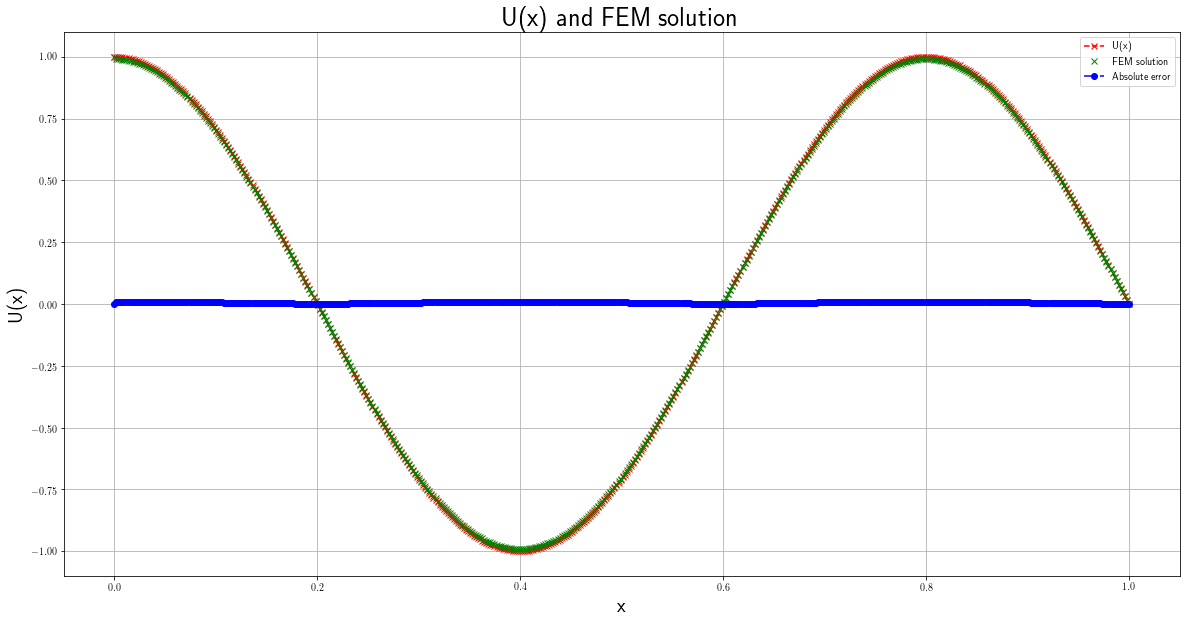

In [10]:
x_show = np.linspace(0,1,500, endpoint = True)
x, FEM_SOL, _ = solve(25, x_show)
fig = plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('U(x) and FEM solution', fontsize=26)
plt.xlabel('x', fontsize=20)
plt.ylabel('U(x)', fontsize=20)
plt.plot(x_show, u(x_show), 'rx--', label = 'U(x)')
plt.plot(x_show, FEM_SOL, 'gx', label = 'FEM solution')
plt.plot(x_show, np.abs(FEM_SOL - u(x_show)), 'bo-.', label = 'Absolute error')
plt.legend()

In [18]:
def calc_derivatives(delta, h):
    der_list = [0]
    l = len(delta)
    for i in range(1, l - 1):
        der_list.append((delta[i + 1] - delta[i - 1]) / (2 * h))
    der_list.append(0)
    return np.array(der_list)    



e0_list = []
e1_list = []
N_list = []
for i in range(50, 501, 50):
    #print(i)
    x_sh = np.linspace(0,1,100000, endpoint = True)
    h = x_sh[1]-x_sh[0]
    x, fem_sol, h_fem = solve(i,x_sh)
    x_sh = np.array(x_sh)
    fem_sol = np.array(fem_sol)
    u_arr = u(x_sh)
    delta = fem_sol - u_arr
    d_delta = calc_derivatives(delta, h)
    e0 = np.sqrt(simps(np.square(delta), x_sh))
    e1 = np.sqrt(simps(np.square(d_delta), x_sh))
    e0_list.append(e0)
    e1_list.append(e1)
    N_list.append(i)

delta_0 k:  -2.015650210446279
delta_1 k:  -2.015282838076228


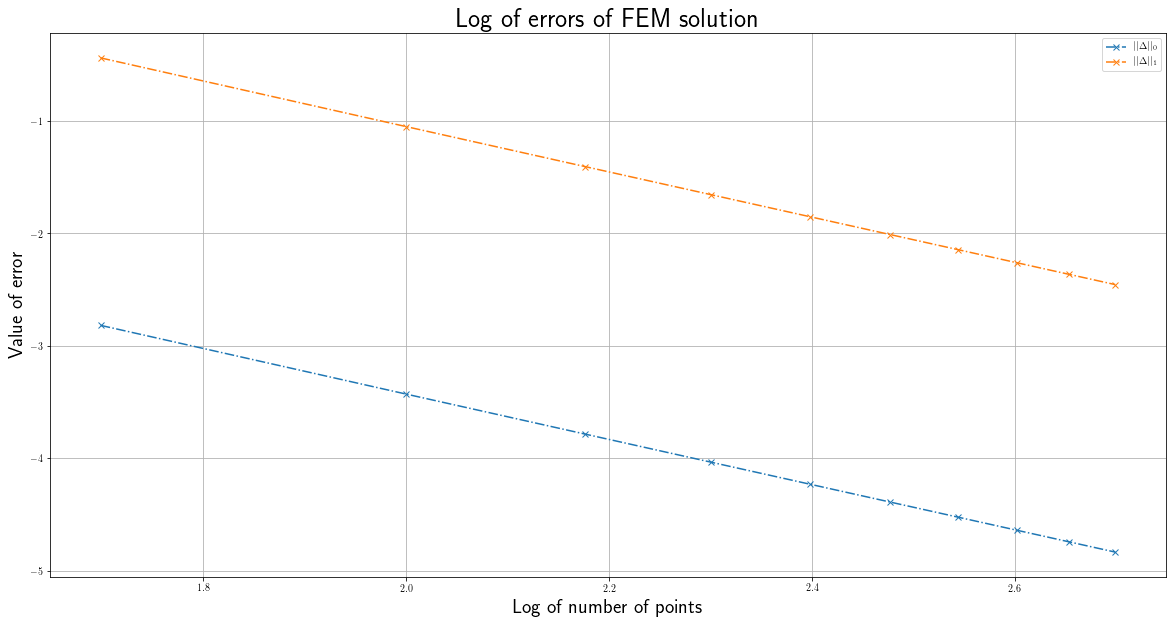

In [19]:
fig = plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Log of errors of FEM solution', fontsize=26)
plt.xlabel('Log of number of points', fontsize=20)
plt.ylabel('Value of error', fontsize=20)
rc('text', usetex=True)
plt.plot(np.log10(N_list), np.log10(e0_list), 'x-.', label='$||\Delta||_0$')
plt.plot(np.log10(N_list), np.log10(e1_list), 'x-.', label='$||\Delta||_1$')
plt.legend()
print("delta_0 k: ", (np.log10(e0_list)[-1]-np.log10(e0_list)[0]) /(np.log10(N_list)[-1]-np.log10(N_list)[0]))
print("delta_1 k: ", (np.log10(e1_list)[-1]-np.log10(e1_list)[0])/(np.log10(N_list)[-1]-np.log10(N_list)[0]))